In [191]:
#Clustering_DBSCAN

#NAMA: Indira Septianita Larasati
#NIM:H071191023

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [220]:
# membaca data
data = pd.read_csv('/content/drive/MyDrive/mesin learning/Heart Failure Prediction/heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [215]:


# menghilangkan kolom yang tidak diperlukan
data = data.drop(["age", "anaemia"], axis=1)
data.head()



,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [216]:
array = data.values
array

array([[5.820e+02, 0.000e+00, 2.000e+01, ..., 0.000e+00, 4.000e+00,
        1.000e+00],
       [7.861e+03, 0.000e+00, 3.800e+01, ..., 0.000e+00, 6.000e+00,
        1.000e+00],
       [1.460e+02, 0.000e+00, 2.000e+01, ..., 1.000e+00, 7.000e+00,
        1.000e+00],
       ...,
       [2.060e+03, 1.000e+00, 6.000e+01, ..., 0.000e+00, 2.780e+02,
        0.000e+00],
       [2.413e+03, 0.000e+00, 3.800e+01, ..., 1.000e+00, 2.800e+02,
        0.000e+00],
       [1.960e+02, 0.000e+00, 4.500e+01, ..., 1.000e+00, 2.850e+02,
        0.000e+00]])

In [222]:
# normalisasi data
from sklearn.preprocessing import StandardScaler
stsclr = StandardScaler().fit(array)
norm_data = stsclr.transform(array)

In [223]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.13, min_samples=11).fit(norm_data)
clusters = pd.DataFrame(model.labels_, columns=['clusters'])
clusters.value_counts()

clusters
-1          299
dtype: int64

In [224]:
#-1 cluster represents outliers which means we have 80 datapts as outliers
final_data = pd.concat([clusters, data],axis=1)
final_data.groupby(final_data.clusters).sum()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
clusters,,,,,,,,,,,,,
-1,18189.334,129,173970,125,11387,105,78744050.75,416.77,40851,194,96,38948,96


Text(0.5, 1.0, ' DBSCAN clustering')

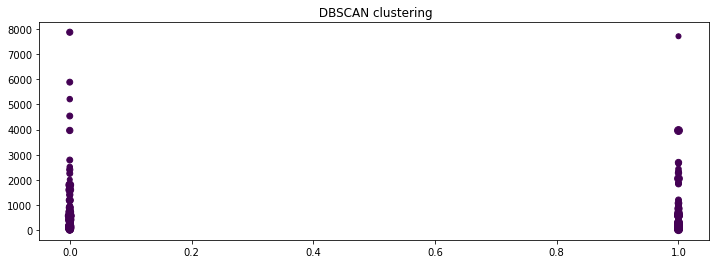

In [225]:
## Tampilkan Plot
plt.figure(figsize=(12,4))
plt.scatter(final_data['diabetes'], final_data['creatinine_phosphokinase'], final_data['ejection_fraction'],c=final_data.clusters, marker='o', alpha=1)

plt.title(' DBSCAN clustering')

Text(0.5, 1.0, ' DBSCAN clustering')

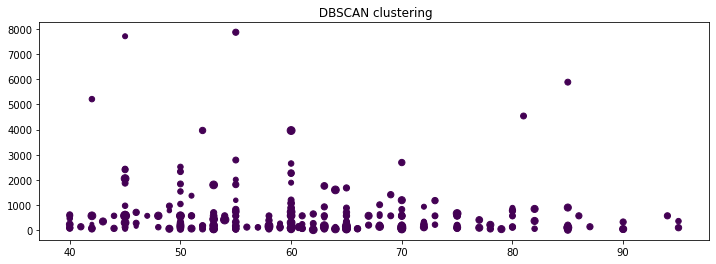

In [226]:
## Tampilkan Plot
plt.figure(figsize=(12,4))
plt.scatter(final_data['age'], final_data['creatinine_phosphokinase'], final_data['ejection_fraction'],c=final_data.clusters, marker='o', alpha=1)

plt.title(' DBSCAN clustering')

